## Module 1: Introduction to Linear Regression Models

### Step 0

Load the appropriate libraries and bring in the data. Note that we have to run a script to get the [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) to match as it is in scikit-learn. We cannot pull it directly from scikit-learn since CodeGrade cannot access the internet.

In [5]:
# CodeGrade step0

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import os
import tarfile
import joblib # Import joblib directly
from sklearn.datasets._base import _pkl_filepath, get_data_home

# Process to get the data to be as it is scikitlearn
archive_path = "California Housing.tgz" # change the path if it's not in the current directory
data_home = get_data_home(data_home=None) # change data_home if you are not using ~/scikit_learn_data
if not os.path.exists(data_home):
    os.makedirs(data_home)
filepath = _pkl_filepath(data_home, 'cal_housing.pkz')

with tarfile.open(mode="r:gz", name=archive_path) as f:
    cal_housing = np.loadtxt(
        f.extractfile('CaliforniaHousing/cal_housing.data'),
        delimiter=',')
    # Columns are not in the same order compared to the previous
    # URL resource on lib.stat.cmu.edu
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    joblib.dump(cal_housing, filepath, compress=6) # Now using the directly imported joblib

# Load the dataset
california = fetch_california_housing(as_frame=True)
data = california.data
target = california.target

### Step 1

*   Create a copy of the data and call it `df`
*   Select the `X` variable to be `MedInc` and the `y` be `MedianHouseValue`

Return `X.shape, y.shape` to verify.



In [7]:
# CodeGrade step1
df = data.copy()

X = df[['MedInc']]
y = target

X.shape, y.shape

((20640, 1), (20640,))

### Step 0

In [8]:
# CodeGrade step0

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

### Step 2

Find `y_pred` by using the model to predict `y` given the argument of `X`.

Return `y_pred.shape` to verify.

In [9]:
# CodeGrade step2
# Generate predicted values for the regression line
y_pred = model.predict(X)
y_pred.shape


(20640,)

Plot the scatterplot with the regression line

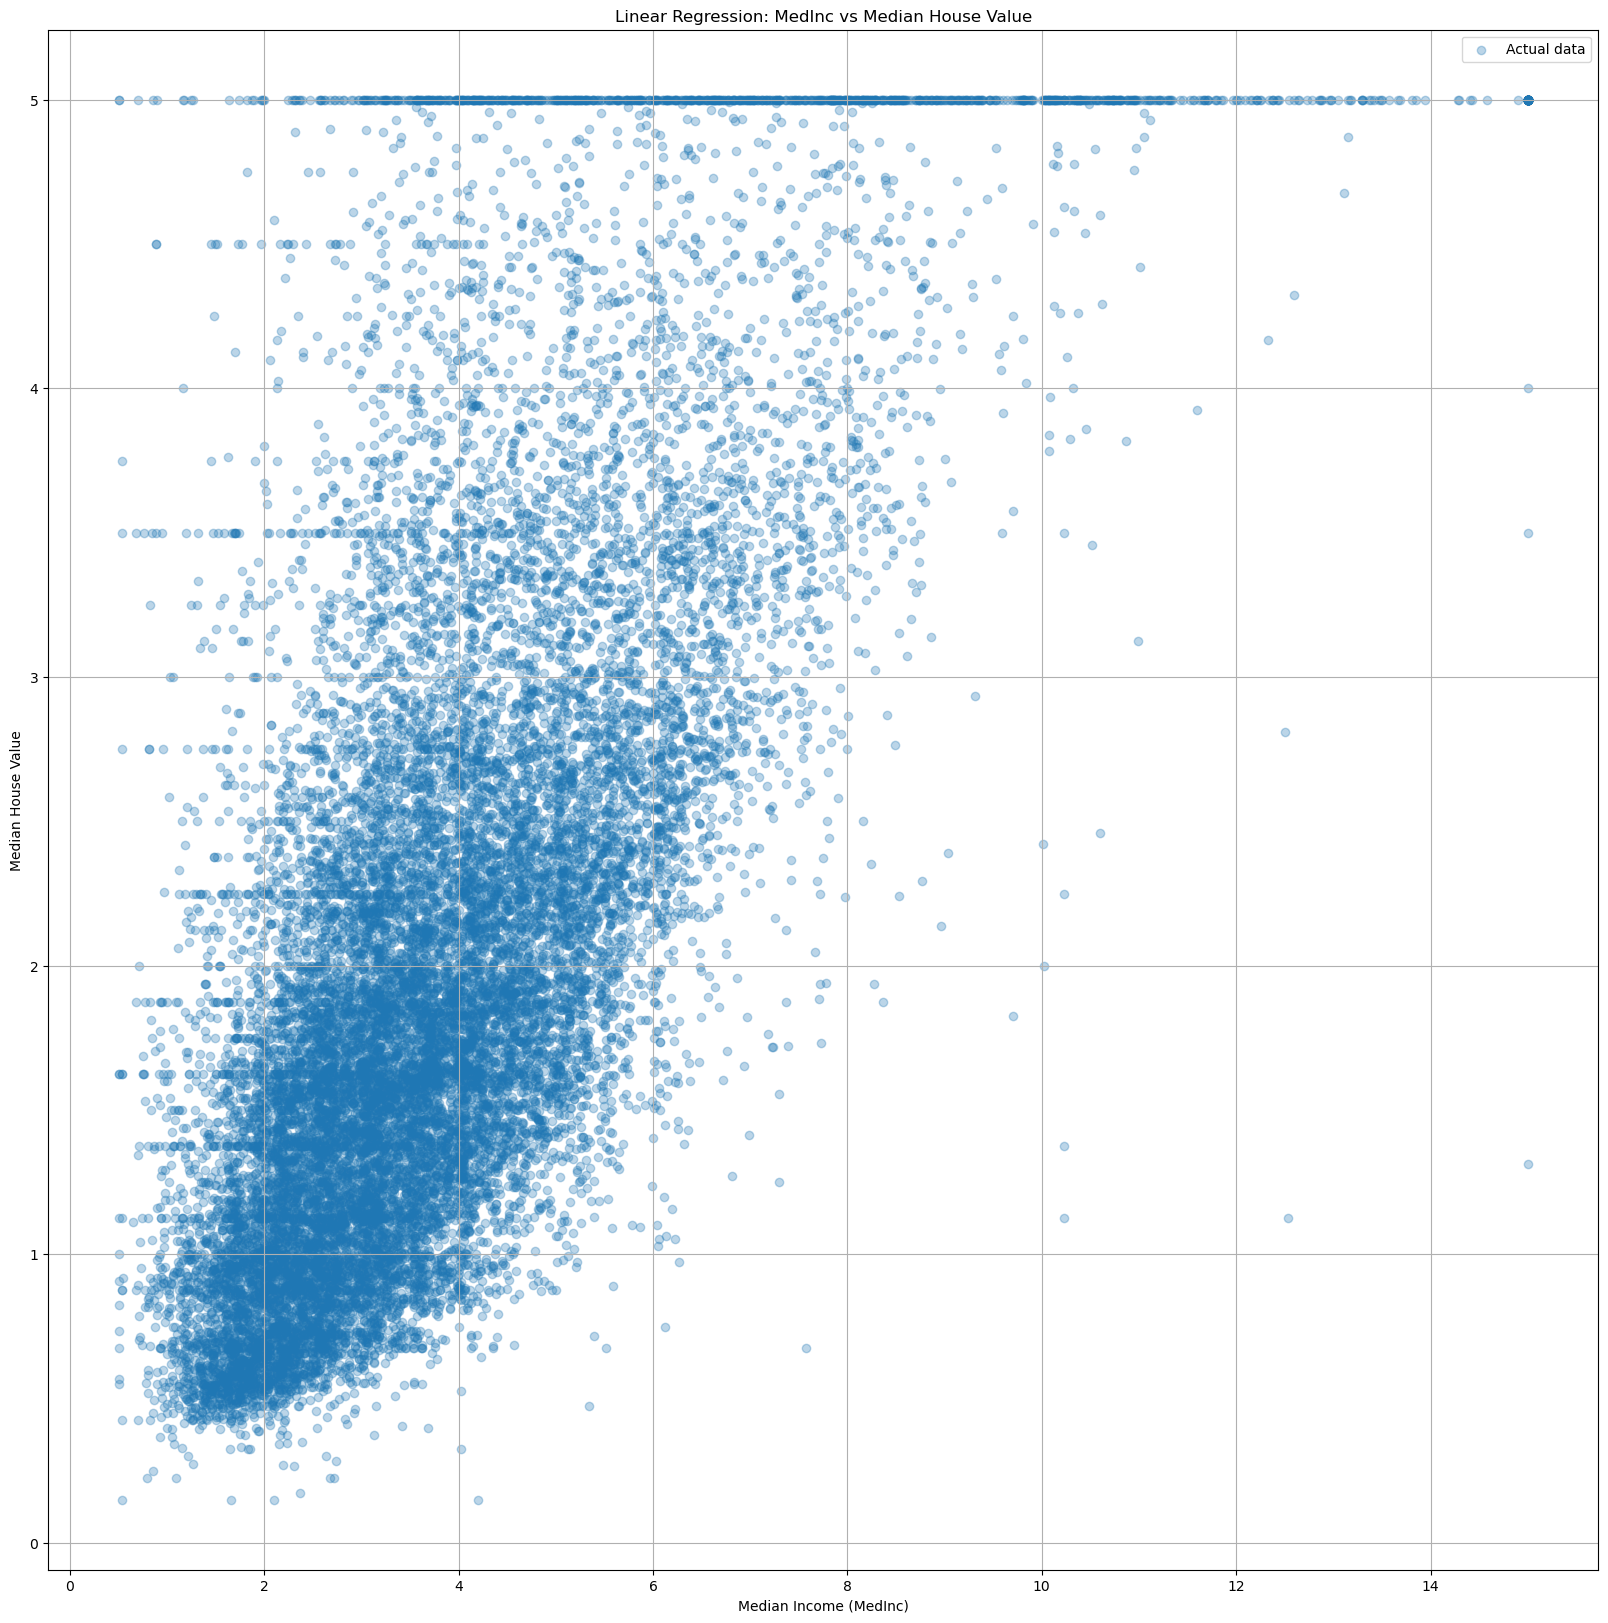

In [14]:
# Plot the scatterplot with the regression line
plt.figure(figsize=(20,20))
plt.scatter(X,y, alpha = .3, label = 'Actual data')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value')
plt.title('Linear Regression: MedInc vs Median House Value')
plt.legend()
plt.grid(True)
plt.show()

### Step 3

Extract the `intercept` and `slope` of the model.

Return `intercept, slope` to verify.

In [15]:
# CodeGrade step3
intercept = model.intercept_
slope = model.coef_[0]
intercept, slope


(0.45085576703267694, 0.41793849201896327)

### Step 4

Calculate the correlation coeficient using `pearsonr` and call this `r`.

Return only `r` not the array and round to two decimal places.

In [16]:
# CodeGrade step4
r, _ = pearsonr(X['MedInc'], y)
round(r, 2)


0.69